In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import os
from scipy.optimize import curve_fit
import B00_codes.dataReader as dr

NO_MS_EQUALS_1 = 0
Q_FINAL = 1
THREE_PI_HALF_FINAL = 2
REF_MINUS_SIG  =3

def smooth(x, n=3):
    K = int((n-1)/2)
    smoothed_x = np.zeros(len(x))
    for i in range(K):
        smoothed_x[i] = x[i]
        smoothed_x[-i-1] = x[-i-1]
    for i in range(0, len(x)-(n-1)):
        for j in range(n):
            smoothed_x[i+K] += x[i+j]/n
    return smoothed_x

def find_peaks(data, threshold=0):
    peaks = []
    for i in range(1, len(data) - 1):
        if data[i] > data[i - 1] and data[i] > data[i + 1] and data[i] > threshold:
            peaks.append(i)
    return peaks

def average(y, n):
    # Initialize an empty list to store the averages
    averages = []

    # Iterate through the array in steps of 3
    for i in range(0, len(y), n):
        group = y[i:i + n]  # Get a group of three points
        average = np.mean(group)  # Calculate the average of the group
        averages.append(average)  # Add the average to the list

    # Convert the list of averages back to a NumPy array
    return np.array(averages)
pi = np.pi
def chi_squared(y, y_fit, sigma):
    residuals = y - y_fit
    return np.sum((residuals / sigma)**2)

def reduced_chi_squared(y, y_fit, sigma, popt, pcov):
    n = len(y)  # Number of data points
    p = len(popt)  # Number of fitting parameters
    dof = n - p  # Degrees of freedom
    chisq = chi_squared(y, y_fit, sigma)  # Chi-squared value
    reduced_chisq = chisq / dof
    return reduced_chisq

# CW ODMR

In [2]:
np.linspace(0.08,0.88,33)

array([0.08 , 0.105, 0.13 , 0.155, 0.18 , 0.205, 0.23 , 0.255, 0.28 ,
       0.305, 0.33 , 0.355, 0.38 , 0.405, 0.43 , 0.455, 0.48 , 0.505,
       0.53 , 0.555, 0.58 , 0.605, 0.63 , 0.655, 0.68 , 0.705, 0.73 ,
       0.755, 0.78 , 0.805, 0.83 , 0.855, 0.88 ])

In [3]:
np.linspace(0.03,0.83,33)

array([0.03 , 0.055, 0.08 , 0.105, 0.13 , 0.155, 0.18 , 0.205, 0.23 ,
       0.255, 0.28 , 0.305, 0.33 , 0.355, 0.38 , 0.405, 0.43 , 0.455,
       0.48 , 0.505, 0.53 , 0.555, 0.58 , 0.605, 0.63 , 0.655, 0.68 ,
       0.705, 0.73 , 0.755, 0.78 , 0.805, 0.83 ])

In [ ]:
# ODMR
days = np.linspace(1,10,10)
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2024-05-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        if 'ODMR_CW' in dataFolder:
            idx = int(dataFolder[1:4])
            if day==10 and idx == 208:
                datafile = mainFolder + dataFolder +'/ODMRAWGObject_sig_set.dat'
sig, ref, popt, perr, x_s = dr.readData(datafile, type='ODMR')

In [ ]:
# ODMR
days = np.linspace(1,10,10)
dataArr = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2024-05-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'ODMR_CW' in dataFolder:
            idx = int(dataFolder[1:4])
            # if (day==1 and idx >= 58 and idx <= 58) or (day==2 and idx <= 4):
            if day==10 and idx >= 169 and idx <= 177:
                datafile = mainFolder + dataFolder +'/ODMRAWGObject_sig_set.dat'
                x_s, sig, ref = dr.readDataNoPlot(datafile)
                sig = np.array(sig); ref = np.array(ref)
                xPlot = x_s
                contrast = sig/ref
                dataArr.append(contrast)

dataArr = np.array(dataArr)

# fig, ax = plt.subplots()
# N_datasets = np.size(dataArr,0)
# y = np.linspace(1,N_datasets, N_datasets)
# X, Y = np.meshgrid(xPlot, y)
# plot = ax.pcolormesh(X,Y, dataArr, cmap='inferno')
# fig.colorbar(plot, orientation='vertical')

In [ ]:
y = y6 = np.average(dataArr, axis=0)
x = x6 = xPlot

fig, ax = plt.subplots(figsize=(12,3))
ax.plot(x,y, label="Averaged", linestyle='-', marker='o', markersize=3,)
ax.set_ylabel('Contrast')
# ax.vlines(x=2.952e9, ymin=min(y), ymax=max(y), linestyle='--', color='red')
ax.legend(fontsize=5)
# ax.set_xlim((2.64e9,2.96e9))

plt.tight_layout()

In [ ]:
y = y6 = np.average(dataArr, axis=0)
x = x6 = xPlot

fig, axs = plt.subplots(3,1)
axs[0].plot(x,y, label="Averaged")
axs[0].set_ylabel('Contrast')
axs[0].vlines(x=2.952e9, ymin=min(y), ymax=max(y), linestyle='--', color='red')
axs[0].legend(fontsize=5)

ys3 = smooth(y,n=3)
axs[1].plot(x, ys3, label="Avg, smoothed n=3", color='C1')
axs[1].set_ylabel('Contrast')
axs[1].vlines(x=2.87e9, ymin=min(ys3), ymax=max(ys3), linestyle='--', color='red')
axs[1].legend(fontsize=5)

ys5 = smooth(y,n=5)
axs[2].plot(x,ys5, label="Avg, smoothed n=5", color='C2')
axs[2].set_ylabel('Contrast')
axs[2].vlines(x=2.87e9, ymin=min(ys5), ymax=max(ys5), linestyle='--', color='red')
axs[2].set_xlabel('f (GHz)')
axs[2].legend(fontsize=5)
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(3,1)
axs[0].plot(x1,smooth(y1,n=5), label="Averaged", linestyle='--')
axs[0].set_ylabel('Contrast')

axs[0].plot(x2,smooth(y2,n=5), label="Avg, smoothed n=3", color='C0', linestyle='--')
axs[0].set_ylabel('Contrast')
# axs[0].legend(fontsize=5)
axs[0].set_xlim((2.3e9,3.3e9))

axs[1].plot(x3,smooth(y3,n=5), label="Avg, smoothed n=5", color='C1', linestyle='--')
axs[1].set_ylabel('Contrast')
# axs[1].set_xlabel('f (GHz)')
axs[1].set_xlim((2.3e9,3.3e9))
# axs[1].legend(fontsize=5)

axs[2].plot(x4,smooth(y4,n=5), label="Avg, smoothed n=5", color='C2', linestyle='--')
axs[2].set_ylabel('Contrast')
axs[2].set_xlabel('f (GHz)')
axs[2].set_xlim((2.3e9,3.3e9))
# axs[1].legend(fontsize=5)
plt.tight_layout()

# Rabi

[9.04773604e-02 8.42943323e+01 2.84398202e-02 9.12185830e-01
 3.86592100e+02]


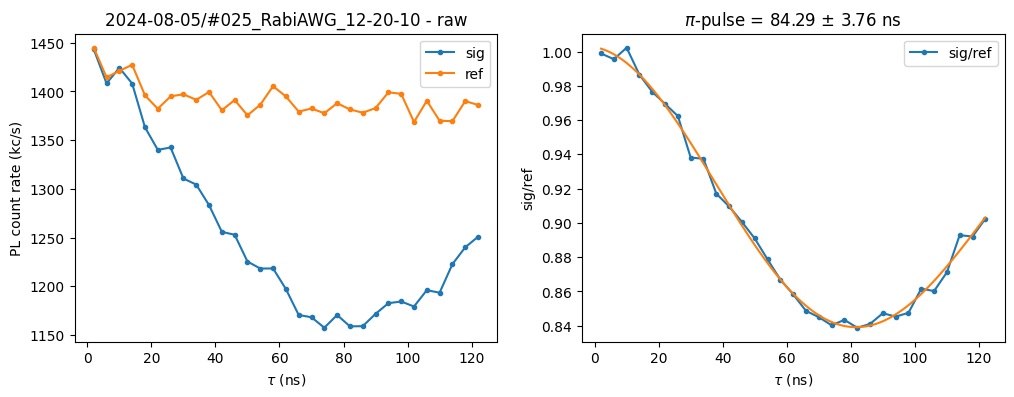

In [708]:
# Rabi
month = 8; days=np.linspace(1,5,5)
dataArr = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2024-0'+str(month)+'-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        if 'RabiAWG' in dataFolder:
            idx = int(dataFolder[1:4])
            if day == 5 and idx >= 25:
                datafile = mainFolder + dataFolder +'/RabiAWGObject_sig_set.dat'

                guess=(0.2, 54, 0, 0.9, 600)
                sig, ref, popt, perr, x_s = dr.readData(datafile, type='RabiDecay', ifFit=1, guess=guess)

In [55]:
# Rabi
days = np.linspace(1,15,15)
dataArr = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2024-05-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        if 'RabiAWG' in dataFolder:
            idx = int(dataFolder[1:4])
            if (day == 15 and idx >= 36 and idx <= 37):
                datafile = mainFolder + dataFolder +'/RabiAWGObject_sig_set.dat'
                x_s, sig, ref = dr.readDataNoPlot(datafile)
                sig = np.array(sig); ref = np.array(ref)
                
                xPlot = x_s
                contrast = sig/ref
                dataArr.append(contrast)

dataArr = np.array(dataArr)
# # Reshape the array to have two rows for each sum
# reshaped_array = dataArr.reshape(-1, 2, dataArr.shape[1])
# # Sum the consecutive 2 rows
# dataArr = np.sum(reshaped_array, axis=1)/2

# fig, ax = plt.subplots(figsize=(4,3))
# N_datasets = np.size(dataArr,0)
# y = np.linspace(1,N_datasets, N_datasets)
# X, Y = np.meshgrid(xPlot, y)
# plot = ax.pcolormesh(X,Y, dataArr, cmap='inferno')
# fig.colorbar(plot, orientation='vertical')

In [ ]:
y = np.average(dataArr, axis=0)
x = xPlot

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x,y, 'o-', markersize=3, label="sig/ref")
ax.set_ylabel('sig/ref')
ax.set_xlabel(r"$\tau$ (ns)")
# ax.set_xlim((0,100))

guess = (0.2, 1750, 0, 0.9, 600)

# xfit, yfit, popt, perr = dr.fitSinusoidDecay(x, y, guess=guess)
# ax.plot(xfit, yfit, color='C1')
ax.set_title('$\pi$-pulse = %.2f $\pm$ %.2f ns' % (popt[1], perr[1]))

In [ ]:
fig,ax=plt.subplots(figsize=(4,3))
y1 = (-1)*np.array((350,372,386,405,419,335,312,291,255))
x1 = np.array((280,286,292,300,304, 267,257,247,232))
y2 = (-1)*np.array((439,465,483,514,))
x2 = np.array((307,307,304,302))

y1 = (-1)*np.array((-28,15,70,118,155,200))
x1 = np.array((-6,18,56,87,111,119))
y2 = (-1)*np.array((200,249,295,340,383))
x2 = np.array((119,114,118,107,101))
ax.scatter(x1,y1)
ax.scatter(x2,y2)
# if y <= -0.42, xBN <= 0.305
# else xBN <= -0.45*y1 + 0.116
xfit, yfit, popt, perr = dr.fitLinear(y1,x1) 
print(popt[0]); print(popt[1]/1e3)
# ax.scatter(-0.454*y1 + 116.3, y1)
ax.scatter(popt[0]*y1 + popt[1], y1)

xfit2, yfit2, popt2, perr2 = dr.fitLinear(y2,x2)
print(popt2[0]); print(popt2[1]/1e3)
ax.scatter(popt2[0]*y2 + popt2[1], y2)

# Pulsed ODMR

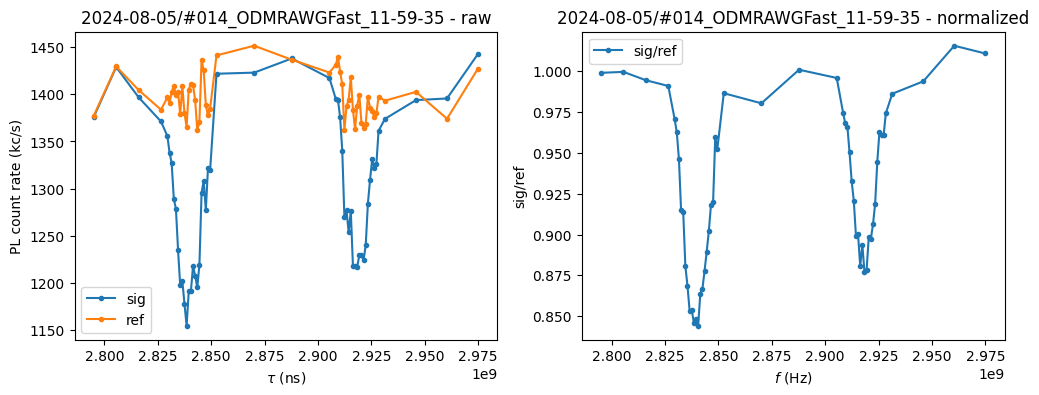

In [663]:
# ODMR
type = 'ODMRAWGFast'
month = 8; days=np.linspace(1,5,5)
# month = 7; days=np.linspace(1,31,31)
# month = 6; days=np.linspace(1,30,30)
# month = 5; days = np.linspace(1,31,31)
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2024-0'+str(month)+'-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        if type in dataFolder:
            idx = int(dataFolder[1:4])
            if day == 5 and idx >= 14:
                datafile = mainFolder + dataFolder +'/' + type + 'Object_sig_set.dat'
                guess=(-2e6, 2.84e9, 0.02e9, 1)
                sig, ref, popt, perr, x_s = dr.readData(datafile, type='ODMR', ifFit=0, guess=guess,typeNorm=0)

[-6.13699966e+05  2.83949399e+09  1.41948945e+07 -4.35975504e+05
  2.91828876e+09  1.29177641e+07  1.01289688e+00]


Text(0.5, 0, 'Frequency (MHz)')

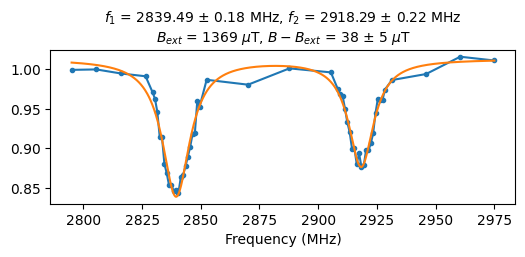

In [664]:
# Bext = 1530; conv = (2*0.028*1e6)
# guess = (-1e5, 2830e6, 25e6, -1e5, 2853e6, 25e6, -1e5, 2910e6, 25e6, -1e5, 2933e6, 25e6, 1.1)
# xfit, yfit, popt, perr = dr.fitLorFour(x_s, sig/ref, guess=guess, lowerBounds=None, upperBounds=None)
# s1 = '$f_1$ = %.2f $\pm$ %.2f MHz, $f_2$ = %.2f $\pm$ %.2f MHz' % (popt[7]/1e6, perr[7]/1e6, popt[4]/1e6, perr[4]/1e6)
# s2 = '$B_{ext}$ = %.0f $\mu$T, $B - B_{ext}$ = %.0f $\pm$ %.0f $\mu$T' % (Bext, np.abs(popt[4]-popt[7])/conv-Bext, np.sqrt(perr[7]**2 + perr[4]**2)/conv)

# Bext = 1431; conv = (2*0.028*1e6)
# guess = (-1e5, 2875e6, 15e6, 1.1)
# xfit, yfit, popt, perr = dr.fitLor(x_s, sig/ref, guess=guess, lowerBounds=None, upperBounds=None)
# s1 = '$f_1$ = %.2f $\pm$ %.2f MHz' % (popt[1]/1e6, perr[1]/1e6)
# print(popt)

Bext = 1369.3; conv = (2*0.028*1e6)
guess = (-1e5, 2842e6, 15e6, -1e5, 2919e6, 15e6,  1.1)
xfit, yfit, popt, perr = dr.fitLorTwo(x_s, sig/ref, guess=guess, lowerBounds=None, upperBounds=None)
s1 = '$f_1$ = %.2f $\pm$ %.2f MHz, $f_2$ = %.2f $\pm$ %.2f MHz' % (popt[1]/1e6, perr[1]/1e6, popt[4]/1e6, perr[4]/1e6)
s2 = '$B_{ext}$ = %.0f $\mu$T, $B - B_{ext}$ = %.0f $\pm$ %.0f $\mu$T' % (Bext, np.abs(popt[4]-popt[1])/conv-Bext, np.sqrt(perr[1]**2 + perr[4]**2)/conv)
print(popt)

fig, ax = plt.subplots(figsize=(6,2))
ax.plot(x_s/1e6, sig/ref, 'o-',markersize=3, )
ax.plot(xfit/1e6,yfit)
ax.set_title(s1 + '\n' + s2, fontsize=10);
ax.set_xlabel('Frequency (MHz)')
# ax.set_title(s1, fontsize=10);
# ax.set_xlim(2830e6,2850e6)

### Repeated pulsed ODMR

In [13]:
# ODMR
days = np.linspace(1,16,16); type = 'ODMRAWGFast'
dataArr = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2024-05-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if type in dataFolder:
            idx = int(dataFolder[1:4])
            if day==16 and idx >= 12 and idx <= 12:
                datafile = mainFolder + dataFolder +'/' + type + 'Object_sig_set.dat'
                x_s, sig, ref = dr.readDataNoPlot(datafile)
                sig = np.array(sig); ref = np.array(ref)
                if type == 'ODMRAWGFast':
                    delta = 0*np.max(sig-ref)
                    contrast =  (sig-delta)/ref
                else:
                    contrast = sig/ref
                dataArr.append(contrast)

dataArr = np.array(dataArr)

# fig, ax = plt.subplots()
# N_datasets = np.size(dataArr,0)
# y = np.linspace(1,N_datasets, N_datasets)
# X, Y = np.meshgrid(x_s, y)
# plot = ax.pcolormesh(X,Y, dataArr, cmap='inferno')
# fig.colorbar(plot, orientation='vertical')

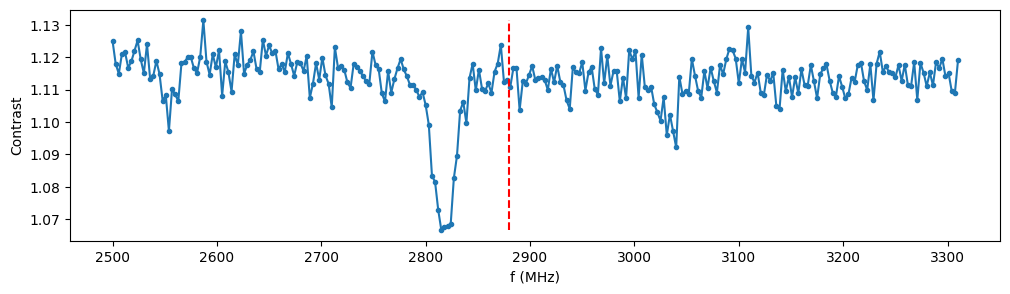

In [192]:
y = np.average(dataArr, axis=0)
x = np.array(x_s)
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(x/1e6,y, 'o-', markersize=3,)
ax.set_xlabel('f (MHz)')
ax.set_ylabel('Contrast')
# ax.set_xlim((2750,2850))
ax.vlines(x=2880, ymin=min(y), ymax=max(y), linestyle='--', color='r')

# guess = (-4e3, 2948e6, 0.2e6, -1e3, 2950e6, 0.2e6, -1e3, 2952e6, 0.2e6, 1)
# lowerBounds = (-6e3,1e9,0,   -20e3,1e9,0, -20e3,1e9,0, 0)
# upperBounds = (0,4e9,1e6,     0,4e9,1e6,   0,4e9,1e6, 2)
# # ax.plot(x, dr.lorThree(x, *guess), color='g')
# xfit, yfit, popt, perr = dr.fitLorThree(x, y, guess=guess, lowerBounds=lowerBounds, upperBounds=upperBounds)
# ax.plot(xfit/1e6, yfit, color='C1', linewidth=1)
# # ax.set_title("$f$ = %.2f $\pm$ %.2f MHz" % (popt[1]/1e6, perr[1]/1e6))
# print(popt)

# threshold = 0.96
# peaks = find_peaks(-y, threshold=-threshold)
# xpeaks = x[peaks]/1e6

# # ax.vlines(x=popt[1], ymin=min(y), ymax=max(y), linestyle='--', color='r')
# # ax.vlines(x=xpeaks[0], ymin=min(y), ymax=max(y), linestyle='--', color='r', linewidth=0.4)
# # ax.vlines(x=xpeaks[1], ymin=min(y), ymax=max(y), linestyle='--', color='g', linewidth=0.4)
# # ax.vlines(x=xpeaks[2], ymin=min(y), ymax=max(y), linestyle='--', color='b', linewidth=0.4)

In [ ]:
# fittedPeaks = np.array((np.round(popt[1]/1e6,3),np.round(popt[4]/1e6,3),np.round(popt[7]/1e6,3),np.round(popt[10]/1e6,3)))
# linewidths = np.array((np.round(popt[2]/1e3,2),np.round(popt[5]/1e3,2),np.round(popt[8]/1e3,2),np.round(popt[11]/1e3,2)))
fittedPeaks = np.array((np.round(popt[1]/1e6,3),np.round(popt[4]/1e6,3),np.round(popt[7]/1e6,3)))
linewidths = np.array((np.round(popt[2]/1e3,2),np.round(popt[5]/1e3,2),np.round(popt[8]/1e3,2)))
print(xpeaks)
print("Fitted peaks (MHz)", fittedPeaks)
print("Deviation from drive (MHz)", np.abs(2950-fittedPeaks))
print("Linewidths (kHz)", linewidths)

# Confocal ODMR

In [87]:
dataArr = []; ifSingleGreenRead=1
# month = 5; days = np.linspace(1,31,31)
month = 6; days = np.linspace(1,12,12)
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2024-0'+str(month)+'-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        type = 'ConfocalODMRAWGFast'
        if type in dataFolder:
            idx = int(dataFolder[1:4])
            # if (day==2 and idx >= 42 and idx <= 46): # (trivial)
            # if day==4 and idx==8: # (trivial) first Rabi-calib scan
            # if day==8 and idx>=9 and idx<=10: # (trivial) rough differential msmt edge 1
            # if day==9 and idx <=5: # (trivial) bare diamond reference

            # if day==3 or (day==4 and idx == 1): # 2D map
            # if (day==5 and idx == 17) or (day==6 and idx <= 2): # 1D scan
            # if (day==6 and idx >= 6 and idx <=11): # rescan near edge 2
            # if (day==7 and idx <= 23): # rescan near edge 1 after magnet alignment
            # if (day==7 and idx >= 24 and idx <= 31): # rescan near edge 2 after magnet alignment
            # if day==8 and idx >= 25 and idx <= 31: # good diff msmt edge 1
            # if day==9 and idx>=6 and idx <= 9: # diff msmt edge 3
            # if day==9 and idx>=10 and idx <= 14: # diff msmt edge 1 extending DS25-31 a bit more
            # if (day==11 and idx <= 27): # line scan FGT
            # if day==11 and idx <= 28: # line scan FGT copy
            # if day==12 and idx == 3: # line scan FGT
            # if day==12 and (idx == 3 or idx == 5): # line scan FGT copy
            # if (day==13 and idx<=2) or (day==14 and idx==3): # 2D
            # if (day==16 and idx == 32): # Failed 2D map for FGT field cooling
            # if (day==17 and idx == 35): # 1D FGT field cooling
            # if (day==17 and idx == 38): # 2D FGT field cooling fine
            # if (day==20 and idx == 4): # 2D FGT field cooling coarse
            # if (day==20 and idx == 20) or (day==21) or (day==22 and idx==1): # 2D UOTe field cooling coarse
            # if day==22 and idx >= 13 and idx <= 15: # 2D UOTe FC left
            # if (day==22 and idx == 21) or (day==23 and idx<=2): # 2D UOTe FC right
            # if (day==23 and idx >=4 and idx<=8): # 2D UOTe FC top
            # if (day==23 and idx == 10) or (day==24 and idx <= 2): # 2D UOTe FC fine
            # if (day==23 and idx >= 11 and idx <= 13): # 2D UOTe FC top
            # if (day==25 and idx>=14) or (day==26 and idx <= 2): #2D UOTe fine FC2
            # if (day==27 and idx==29): #2D FGT fine FC2
            # if (day==31 and idx==14): # 2D UOTe fine FC2 75K   
            # if (day==3 and idx==23): # FGT coarse in BN (DS21,23) or FGT (DS22) at 115 K 
            # if (day==5 and idx==12): # FGT FC1 coarse in BN (DS 11) or FGT (DS 12) at 130 K 
            # if (day==5 and idx==18): # FGT FC1 coarse in BN (DS 18) or FGT (DS 19) at 100 K 
            # if (day==7 and idx==6): # FGT FC1 coarse in BN (DS 5) or FGT (DS 6) at 50 K 
            # if (day==7 and idx==14): # FGT FC1 coarse in BN (DS 13) or FGT (DS 14) at 25 K 
            if (day==12 and idx==14):
                datafile = mainFolder + dataFolder + '/' + type + 'Object_y_set_'+type+'Object_x_set_'+type+'Object_sig_set - Copy.dat'
                x,y,freq,sig,ref = dr.readDataConfocalODMR(datafile, freqSplitFactor=1)
                sig = np.array(sig); ref = np.array(ref); contrast = sig/ref
                x = np.array(x); y = np.array(y)
                (ny,nx,nfreq) = np.shape(sig)
                # if ifSingleGreenRead==1:
                #     maxsig = np.max(sig-ref,axis=2)
                #     for j in range(ny):
                #         for i in range(nx):
                #             contrast[j,i] = sig[j,i] - maxsig[j,i]
                #             contrast[j,i] = contrast[j,i]/ref[j,i]
                dataArr.append(contrast)
dataArr = np.array(dataArr); print(np.shape(dataArr))
dataArr = np.average(dataArr, axis=0)


(1, 1, 19, 56)


In [16]:
freqmins = -1e11*np.ones((ny,nx)); freqerrs = np.zeros((ny,nx))
convfactor = 2*0.028*1e6; conv_voltage=10; ifDifferential=1; Bext=1700; errTolerance = np.inf#10#

lowerBounds = (-np.inf,-np.inf,4.99e6,-np.inf,-np.inf,4.99e6,-np.inf)
lowerBounds2 = (-np.inf,-np.inf,4.99e6,-np.inf,2.91e9,4.99e6,-np.inf)
upperBounds2 = (0,2.84e9,np.inf,0,np.inf,np.inf,np.inf)

def doException():
    xfit = freq[j,i]; yfit = dataArr[j,i]
    popt = np.array((-1, -1,-1,-1,  1,-1,-1))*1e9
    perr = np.array((1e9,1e9,1e9,1e9,1e9,1e9,1e9))*1e3
    print("Cannot fit " + label)
    return xfit, yfit, popt, perr

In [17]:
imarker = 200
for j in range(ny):
    for i in range(nx):
        label = 'x = %.3f, y = %.3f' % (x[j,i,0], y[j,i,0])
        # freqmin = freq[j,i,np.argmin(dataArr[j,i])]
        # freqmins[j,i] = freqmin
        if ifDifferential==0:
            guess = (-1e5, freq[j,i,np.argmin(dataArr[j,i])], 10e6, 1); lowerBounds=None; upperBounds=None
            xfit, yfit, popt, perr = dr.fitLor(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=upperBounds)
            freqmins[j,i] = popt[1]; freqerrs[j,i] = perr[1]
        else:
            # guess = (-1e5, 2843e6, 5e6, -1e5, 2925e6, 5e6, 1); lowerBounds=None; upperBounds=None
            # xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=upperBounds)
            # freqmins[j,i] = popt[4]-popt[1]; freqerrs[j,i] = np.sqrt(perr[4]**2 + perr[1]**2)
#             try:
#                 guess = (-1e5, 2780e6, 5e6, -1e5, 3000e6, 5e6, 1); lowerBounds=lowerBounds; upperBounds=None
#                 xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=upperBounds)
#                 if np.abs(freq[j,i][np.argmin(dataArr[j,i])]-2.88e9) < 70e6:
#                     guess = (-1e5, 2830e6, 15e6, -1e5, 2930e6, 15e6, 1); lowerBounds=lowerBounds; upperBounds=None
#                     xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=upperBounds)
#             except Exception as e:
#                 xfit, yfit, popt, perr = doException()
# ########################################
            if np.abs(freq[j,i][np.argmin(dataArr[j,i])]-2.88e9) < 30e6:
                try:
                    guess = (-1e5, 2870e6, 15e6, -1e5, 2890e6, 15e6, 1)
                    # if i==64: guess = (-1e5, 2810e6, 15e6, -1e5, 2950e6, 15e6, 1)
                    xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=None)
                except Exception as e:
                    try:
                        guess = (-1e5, 2780e6, 25e6, -1e5, 2980e6, 25e6, 1)
                        xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds2, upperBounds=upperBounds2)
                    except Exception as e:
                        xfit, yfit, popt, perr = doException()
            else:
                try:
                    guess = (-1e5, 2840e6, 5e6, -1e5, 2920e6, 5e6, 1)
                    xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=None)
                    if np.max((np.abs(popt[1]-2.88e9),np.abs(popt[4]-2.88e9))) > 60e6:
                        try:
                            guess = (-1e5, 2780e6, 25e6, -1e5, 2980e6, 25e6, 1)
                            xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds2, upperBounds=upperBounds2)
                        except Exception as e:
                            xfit, yfit, popt, perr = doException()
                except Exception as e:
                    xfit, yfit, popt, perr = doException()

            err = np.abs(np.sum(perr/popt))
            if err <= errTolerance:
                freqmins[j,i] = np.abs(popt[4]-popt[1]); freqerrs[j,i] = np.sqrt(perr[4]**2 + perr[1]**2)

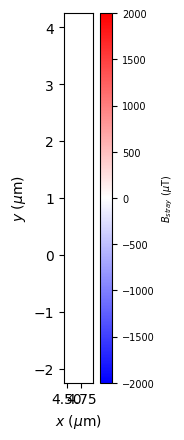

In [18]:
# 2D       
X = x[:,:,0]*conv_voltage; Y = y[:,:,0]*conv_voltage
fig, ax = plt.subplots()
if ifDifferential==0:
    #####   Single resonance, f- or f+   #########
    plot = ax.pcolormesh(X,Y, (freqmins- np.average(freqmins))/convfactor, cmap='bwr') #
else:
    # #####   Differential, independent scans of f- and f+   #########
    # fminus = freqmins[rowidx][::2]; fplus = freqmins[rowidx][1::2]
    # deltaf = fplus-fminus; meanDeltaf = np.average(deltaf)
    # fminuserrs = freqerrs[rowidx][::2]; fpluserrs = freqerrs[rowidx][1::2]#0*
    # plot = ax.errorbar(xplot , (deltaf - meanDeltaf)/convfactor, np.sqrt(fminuserrs**2+fpluserrs**2)/convfactor,
    #                 fmt='o', color='blue', markersize=3, capsize=5, capthick=0.5, ecolor='red', elinewidth=1);

    #####   Differential, single scan that has both f- and f+   #########
    meanDeltaf = Bext*convfactor #1431 #81948173.46995163#np.average(freqmins[rowidx])
    dataPlot = (freqmins - meanDeltaf)/convfactor
    plot = ax.pcolormesh(X,Y, dataPlot, cmap='bwr');
    
ax.set_aspect(1)
# plot = ax.pcolormesh(X,Y, np.min(dataArr,axis=2), cmap='inferno')
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
cbar = fig.colorbar(plot, cax = cax)
cbar.ax.tick_params(labelsize=7)
cbar.set_label('$B_{stray}$ ($\mu$T)', fontsize=7)
plot.set_clim(-2000,2000)

ax.set_xlabel('$V_x$ (V)')
ax.set_ylabel('$V_y$ (V)')

ax.set_xlabel('$x$ ($\mu$m)')
ax.set_ylabel('$y$ ($\mu$m)')
# sp = 0.025*conv_voltage
# for j in range(ny):
#     for i in range(nx):
#         if dataPlot[j,i] < -10000:
#             ax.add_patch(plt.Rectangle((X[0][i]-sp/2, Y[j][0]-sp/2), sp, sp, color='black'))

plt.tight_layout;

In [19]:
# a = Bext+np.average(dataPlot[:,0:2]); b = Bext+np.average(dataPlot[:,-2:])
# print(a)
# print(b)
# print(a-b)

print(Bext+np.average(dataPlot))

1826.9608370490375


In [10]:
rowidx = 9; errTolerance = np.inf; Bext=1700
freqmins = -1e11*np.ones((ny,nx)); freqerrs = np.zeros((ny,nx))
convfactor = 2*0.028*1e6; ifDifferential=1

mid = 2781645196.9597583 # Long 1D scan 240505 DS17 to 240506 DS2
# mid = 2840721239.1147146 #240507 17-23
# mid = 2842.93e6 

lowerBounds = (-np.inf,-np.inf,4.99e6,-np.inf,-np.inf,4.99e6,-np.inf)
lowerBounds2 = (-np.inf,-np.inf,4.99e6,-np.inf,2.91e9,4.99e6,-np.inf)
upperBounds2 = (0,2.84e9,np.inf,0,np.inf,np.inf,np.inf)

def doException():
    xfit = freq[j,i]; yfit = dataArr[j,i]
    popt = np.array((-1,-1,-1,-1,1,-1,-1))*1e9
    perr = np.array((1e9,1e9,1e9,1e9,1e9,1e9,1e9))*1e12
    print("Cannot fit " + label)
    return xfit, yfit, popt, perr

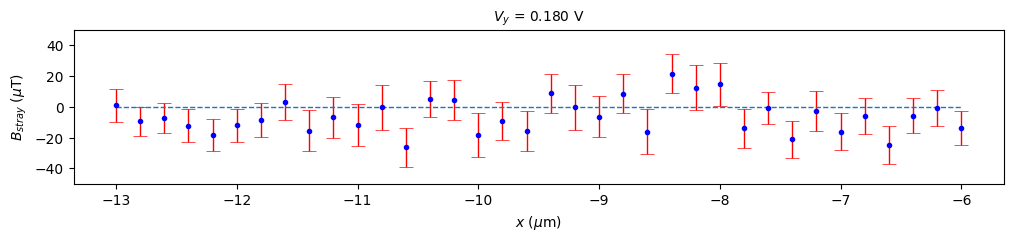

In [39]:
for j in range(ny):
    for i in range(nx):
        label = 'x = %.3f, y = %.3f' % (x[j,i,0], y[j,i,0])
        # freqmin = freq[j,i,np.argmin(dataArr[j,i])]
        # freqmins[j,i] = freqmin
        
        if ifDifferential==0:
            guess = (-1e5, freq[j,i,np.argmin(dataArr[j,i])], 10e6, 1)
            xfit, yfit, popt, perr = dr.fitLor(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=None, upperBounds=None)
            freqmins[j,i] = popt[1]; freqerrs[j,i] = perr[1]
        else:
            # guess = (-1e5, 2843e6, 5e6, -1e5, 2925e6, 5e6, 1)
            # xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=None, upperBounds=None)
            # freqmins[j,i] = popt[4]-popt[1]; freqerrs[j,i] = np.sqrt(perr[4]**2 + perr[1]**2)
# ###################################################
#             try:
#                 guess = (-1e5, 2840e6, 5e6, -1e5, 2920e6, 5e6, 1)
#                 xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=None)
#                 if np.abs(freq[j,i][np.argmin(dataArr[j,i])]-2.88e9) < 30e6:
#                     guess = (-1e5, 2870e6, 15e6, -1e5, 2890e6, 15e6, 1)
#                     xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=None)
#             except Exception as e:
#                 xfit, yfit, popt, perr = doException()
# ######################################################
            # try:
            #     guess = (-1e5, 2840e6, 5e6, -1e5, 2920e6, 5e6, 1.15)
            #     xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=None)
            #     if np.max((np.abs(popt[1]-2.88e9),np.abs(popt[4]-2.88e9))) > 60e6:
            #         guess = (-1e5, 2780e6, 25e6, -1e5, 2980e6, 25e6, 1.15)
            #         xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds2, upperBounds=upperBounds2)
            #     if np.abs(freq[j,i][np.argmin(dataArr[j,i])]-2.88e9) < 30e6:
            #         guess = (-1e5, 2870e6, 15e6, -1e5, 2890e6, 15e6, 1.15)
            #         xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=None)              
            # except Exception as e:
                # xfit, yfit, popt, perr = doException()
######################################################
            if np.abs(freq[j,i][np.argmin(dataArr[j,i])]-2.88e9) < 30e6:
                try:
                    guess = (-1e5, 2870e6, 15e6, -1e5, 2890e6, 15e6, 1)
                    if i==64: guess = (-1e5, 2810e6, 15e6, -1e5, 2950e6, 15e6, 1)
                    xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=None)
                except Exception as e:
                    try:
                        guess = (-1e5, 2780e6, 25e6, -1e5, 2980e6, 25e6, 1)
                        xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds2, upperBounds=upperBounds2)
                    except Exception as e:
                        xfit, yfit, popt, perr = doException()
            else:
                try:
                    guess = (-1e5, 2840e6, 5e6, -1e5, 2920e6, 5e6, 1)
                    xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=None)
                    if np.max((np.abs(popt[1]-2.88e9),np.abs(popt[4]-2.88e9))) > 60e6:
                        try:
                            guess = (-1e5, 2780e6, 25e6, -1e5, 2980e6, 25e6, 1)
                            xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds2, upperBounds=upperBounds2)
                        except Exception as e:
                            xfit, yfit, popt, perr = doException()
                except Exception as e:
                    xfit, yfit, popt, perr = doException()

            err = np.abs(np.sum(perr/popt))
            if err <= errTolerance:
                freqmins[j,i] = np.abs(popt[4]-popt[1]); freqerrs[j,i] = np.sqrt(perr[4]**2 + perr[1]**2)
        
# 1D
fig, ax = plt.subplots(figsize=(12,2))

if ifDifferential==0:
    #####   Single resonance, f- or f+   #########
    plot = ax.errorbar(x[:,:,0][rowidx]*10, (freqmins[rowidx] - mid)/convfactor, freqerrs[rowidx]/convfactor,
                    fmt='o', color='blue', markersize=3, capsize=5, capthick=0.5, ecolor='red', elinewidth=1);
else:
    # #####   Differential, independent scans of f- and f+   #########
    # xplot = x[:,:,0][rowidx][::2]*10
    # fminus = freqmins[rowidx][::2]; fplus = freqmins[rowidx][1::2]
    # deltaf = fplus-fminus; meanDeltaf = np.average(deltaf)
    # fminuserrs = freqerrs[rowidx][::2]; fpluserrs = freqerrs[rowidx][1::2]#0*
    # plot = ax.errorbar(xplot , (deltaf - meanDeltaf)/convfactor, np.sqrt(fminuserrs**2+fpluserrs**2)/convfactor,
    #                 fmt='o', color='blue', markersize=3, capsize=5, capthick=0.5, ecolor='red', elinewidth=1);

    #####   Differential, single scan that has both f- and f+   #########
    xplot = x[:,:,0][rowidx]*10
    meanDeltaf = Bext*convfactor #1431 #81948173.46995163#np.average(freqmins[rowidx])
    yplot = (freqmins[rowidx] - meanDeltaf)/convfactor; yerr = (freqerrs[rowidx])/convfactor
    plot = ax.errorbar(xplot, yplot-0*1439, yerr,
                    fmt='o', color='blue', markersize=3, capsize=5, capthick=0.5, ecolor='red', elinewidth=1);
    # a = 58; b = None
    # plot = ax.errorbar(xplot[a:b], -yplot[a:b]-1*1439, yerr[a:b],
    #                     fmt='o', color='green', markersize=3, capsize=5, capthick=0.5, ecolor='red', elinewidth=1);
    # # plot = ax.errorbar(xplotOld , yplotOld, yerrOld,
    #                     fmt='o', color='blue', markersize=3, capsize=5, capthick=0.5, ecolor='red', elinewidth=1);
    
ax.set_xlabel('$V_x$ (V)'); ax.set_xlabel('$x$ ($\mu$m)')
ax.set_ylabel('$f_{NV}$ (MHz)'); ax.set_ylabel('$B_{stray}$ ($\mu$T)')
# ax.set_xlim((-13,0))
ax.set_ylim((-50,50))
ax.hlines(y=0,xmin=min(xplot),xmax=max(xplot),linewidth=1, linestyle='--')
ax.set_title('$V_y$ = %.3f V' % y[:,:,0][rowidx][0], fontsize=10)

plt.tight_layout;

# xplotOld = xplot; yplotOld = (freqmins[rowidx] - meanDeltaf)/convfactor; yerrOld = (freqerrs[rowidx])/convfactor

In [ ]:
fig, ax = plt.subplots(figsize=(4,7)); scaleForShift = 0.01
for j in range(ny):
    for i in range(nx):
        rawplot, = ax.plot(freq[j,i], dataArr[j,i] + scaleForShift*(j*nx+i), '-o',markersize=3, linewidth=0.8, label='x = %.3f, y = %.3f' % (x[j,i,0], y[j,i,0]))
        # guess = (-1e5, freq[j,i,np.argmin(dataArr[j,i])], 5e6, 1); lowerBounds=None; upperBounds=None
        # xfit, yfit, popt, perr = dr.fitLor(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=upperBounds)
        guess = (-1e5, 2843e6, 5e6, -1e5, 2925e6, 5e6, 1); lowerBounds=None; upperBounds=None
        # xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=upperBounds)
        # ax.plot(xfit, yfit + scaleForShift*(j*nx+i), color=rawplot.get_color(),linewidth=2)

ax.legend(fontsize=6,loc='upper left', bbox_to_anchor=(1, 1));

In [88]:
j = 0; i = 3; errTolerance = np.inf; Bext = 1381.4; conv = (2*0.028*1e6)
idxArray = np.linspace(0,i,i+1)

lowerBounds = (-np.inf,-np.inf,4.99e6,-np.inf,-np.inf,4.99e6,-np.inf)
lowerBounds2 = (-np.inf,-np.inf,4.99e6,-np.inf,2.91e9,4.99e6,-np.inf)
upperBounds2 = (0,2.84e9,np.inf,0,np.inf,np.inf,np.inf)

def doException():
    # ax.plot(freq[j,i], dr.lorTwo(freq[j,i], *guess))
    xfit = freq[j,i]; yfit = dataArr[j,i]
    popt = np.array((-1,-1,-1,-1,1,-1,-1))*1e9
    perr = np.array((1e9,1e9,1e9,1e9,1e9,1e9,1e9))*1e12
    print("Cannot fit " + label)
    return xfit, yfit, popt, perr

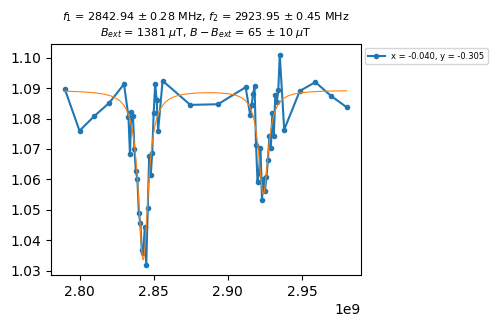

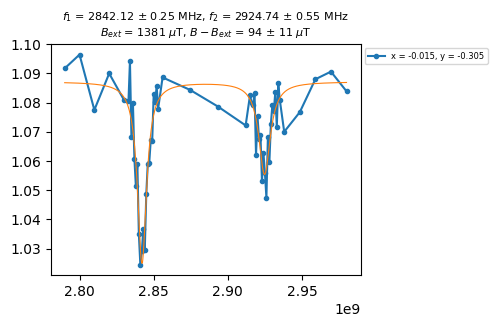

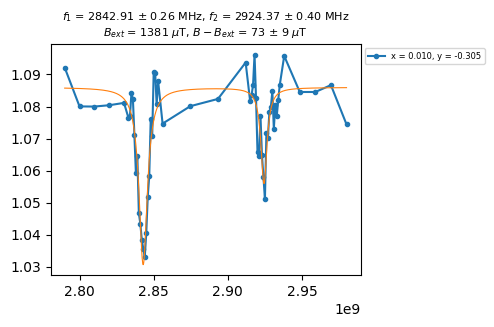

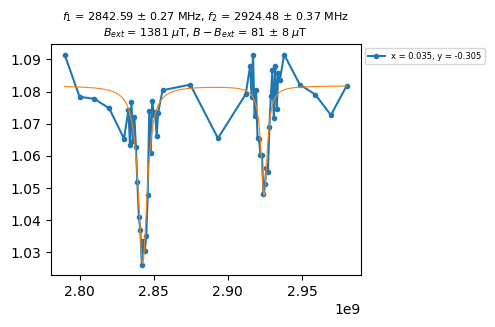

In [89]:
for i in idxArray:
    i = int(i)
    fig, ax = plt.subplots(figsize=(4,3))
    label = 'x = %.3f, y = %.3f' % (x[j,i,0], y[j,i,0])
    ax.plot(freq[j,i], dataArr[j,i], 'o-',markersize=3,  label=label)
    ax.legend(fontsize=6,loc='upper left', bbox_to_anchor=(1, 1))

    # guess = (-1e5, freq[j,i,np.argmin(dataArr[j,i])], 5e6, 1)
    # xfit, yfit, popt, perr = dr.fitLor(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=None, upperBounds=None)
    # ax.plot(xfit, yfit, linewidth=0.8)
    # ax.set_title('$f$ = %.2f $\pm$ %.2f MHz' % (popt[1]/1e6, perr[1]/1e6), fontsize=10);
#     try:
#         guess = (-1e5, 2840e6, 5e6, -1e5, 2920e6, 5e6, 1)
#         xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=None)
#         if np.abs(freq[j,i][np.argmin(dataArr[j,i])]-2.88e9) < 30e6:
#             guess = (-1e5, 2870e6, 15e6, -1e5, 2890e6, 15e6, 1)
#             xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=None)
#     except Exception as e:
#         xfit, yfit, popt, perr = doException()
# # #################################################
#     try:
#         guess = (-1e5, 2840e6, 5e6, -1e5, 2920e6, 5e6, 1.15)
#         xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=None)
#         if np.max((np.abs(popt[1]-2.88e9),np.abs(popt[4]-2.88e9))) > 60e6:
#             guess = (-1e5, 2780e6, 25e6, -1e5, 2980e6, 25e6, 1.15)
#             xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds2, upperBounds=upperBounds2)
#         if np.abs(freq[j,i][np.argmin(dataArr[j,i])]-2.88e9) < 30e6:
#             guess = (-1e5, 2870e6, 15e6, -1e5, 2890e6, 15e6, 1.15)
#             xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=None) 
#     except Exception as e:
#         xfit, yfit, popt, perr = doException()
# ##################################################

    if np.abs(freq[j,i][np.argmin(dataArr[j,i])]-2.88e9) < 30e6:
        try:
            guess = (-1e5, 2870e6, 15e6, -1e5, 2890e6, 15e6, 1)
            # if i==51: guess = (-1e5, 2810e6, 15e6, -1e5, 2950e6, 15e6, 1)
            xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=None)
        except Exception as e:
            try:
                guess = (-1e5, 2780e6, 25e6, -1e5, 2980e6, 25e6, 1)
                xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds2, upperBounds=upperBounds2)
            except Exception as e:
                xfit, yfit, popt, perr = doException()
    else:
        try:
            guess = (-1e5, 2840e6, 5e6, -1e5, 2920e6, 5e6, 1)
            xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds, upperBounds=None)
            if np.max((np.abs(popt[1]-2.88e9),np.abs(popt[4]-2.88e9))) > 60e6:
                try:
                    guess = (-1e5, 2800e6, 25e6, -1e5, 2960e6, 25e6, 1)
                    xfit, yfit, popt, perr = dr.fitLorTwo(freq[j,i], dataArr[j,i], guess=guess, lowerBounds=lowerBounds2, upperBounds=upperBounds2)
                except Exception as e:
                    xfit, yfit, popt, perr = doException()
        except Exception as e:
            xfit, yfit, popt, perr = doException()
    
    err = np.abs(np.sum(perr/popt))
    if err > errTolerance:
        print(label + '. Bad fit: err =  ' + str(err))
    else:
        ax.plot(xfit, yfit, linewidth=0.8)
        # ax.set_xlim(2.8e9,2.96e9)
    # print(popt)
    # ax.set_ylim((1.08,1.18))
    s1 = '$f_1$ = %.2f $\pm$ %.2f MHz, $f_2$ = %.2f $\pm$ %.2f MHz' % (popt[1]/1e6, perr[1]/1e6, popt[4]/1e6, perr[4]/1e6)
    s2 = '$B_{ext}$ = %.0f $\mu$T, $B - B_{ext}$ = %.0f $\pm$ %.0f $\mu$T' % (Bext, np.abs(popt[4]-popt[1])/conv-Bext, np.sqrt(perr[1]**2 + perr[4]**2)/conv)
    ax.set_title( s1 + '\n' + s2, fontsize=8);

# T2E

[ 0.01233998 -0.00722915  0.06966917]


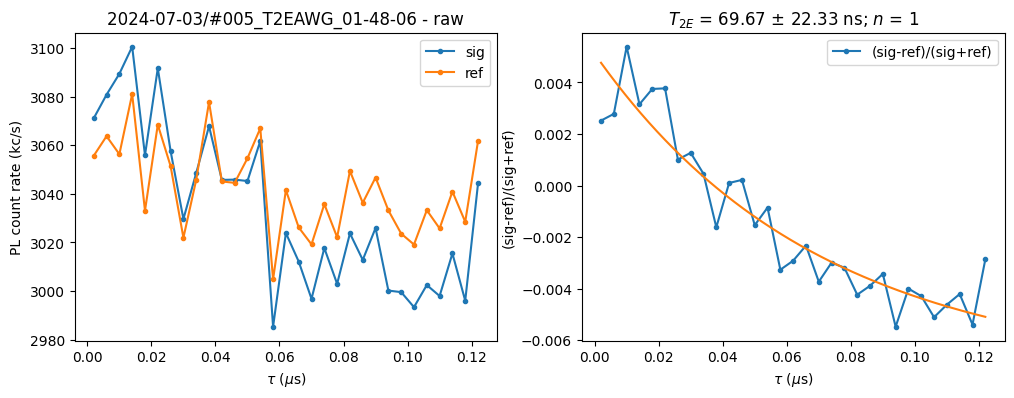

[ 0.00841474 -0.00320581  0.03104928]


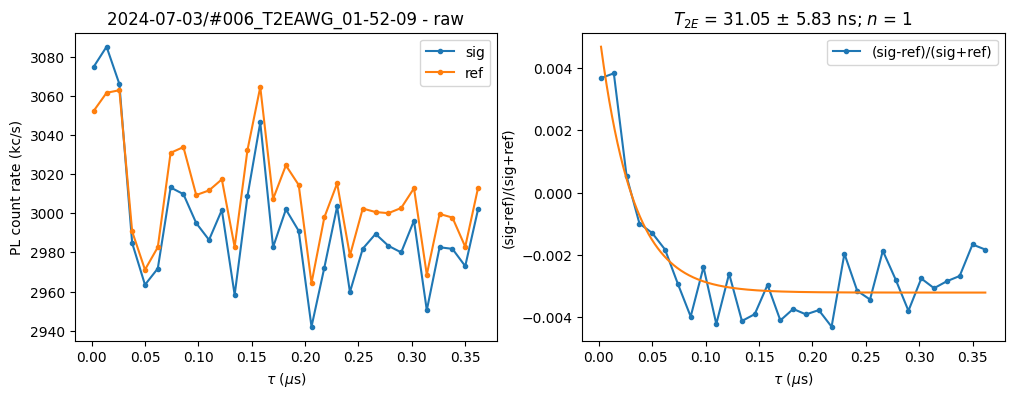

In [95]:
type = 'T2EAWG'
# month = 6; days=np.linspace(1,14,14)
month = 7; days=np.linspace(1,3,3)
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2024-0'+str(month)+'-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        if type in dataFolder:
            idx = int(dataFolder[1:4])
            if day==3 and idx >= 5:
                datafile = mainFolder + dataFolder +'/T2EAWGObject_sig_set.dat'
                guess = (0.01, -0.002, 0.02)
                sig, ref, popt, perr, x_s = dr.readData(datafile, type='T2E', typeNorm=Q_FINAL, ifFit=1, guess=guess)

In [ ]:
sorted_indices = np.argsort(x_s)
x_s = x_s[sorted_indices]
sig = sig[sorted_indices]
ref = ref[sorted_indices]

fig, ax = plt.subplots(figsize=(11,3))
x = x_s
y = (sig-ref)/(sig+ref)

# y = y[1001:1111]; x = x[1001:1111]
# y = smooth(y,45)
# y = average(y,3); x = average(x,3)

# y1 = smooth(y[0:1001],15); y2 = smooth(y[1001:1111],5); y3 = y[1111:]
# y = np.concatenate((y1,y2,y3))

y1 = average(y[0:1001],1); y2 = average(y[1001:1111],1); y3 = y[1111:]
x1 = average(x[0:1001],1); x2 = average(x[1001:1111],1); x3 = x[1111:]
y = np.concatenate((y1,y2,y3)); x = np.concatenate((x1,x2,x3))

ax.plot(x/1e3,y, 'o-', markersize=3,)
ax.set_xlabel(r"$\tau$ ($\mu$s)")
ax.set_ylabel('(sig-ref)/(sig+ref)')
# ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_ylim((3e-4,0.175))


guess = (0.11, 320, 1.5, 0)
# ax.plot(x/1e3, dr.strDecay(x/1e3, *guess),  'o-', markersize=3,color='C2')
# xfit, yfit, popt, perr = dr.fitStrDecay(x/1e3, y, guess=guess, 
#                                         lowerBounds=(0, 50, 0, -0.1), upperBounds=(1, 25000, 3, 0.1))
# ax.plot(xfit, yfit, color='C1')
# ax.set_title(r'$T_{2E}$ = %.2f $\pm$ %.2f $\mu$s; $n$ = %.2f $\pm$ %.2f' % (popt[1], perr[1], popt[2], perr[2]))

# ax.set_title(r'$T_{2E}$ = %.2f $\pm$ %.2f $\mu$s; $n$ = %.2f $\pm$ %.2f' % (popt[1], perr[1], popt[2], perr[2]))
# xfit = np.linspace(x[0], x[-1], 1001)
# yfit = dr.strDecay(xfit, *popt)
# ax.plot(xfit, yfit, color='C1')


In [ ]:
yfourier = np.fft.fft(y-np.average(y)); yfourier = np.abs(yfourier)
f = np.fft.fftfreq(len(y), 40e-9)/1e6

sorted_indices = np.argsort(f)       # Get the indices that would sort f
f = f[sorted_indices]                # Sort f in ascending order
yfourier = yfourier[sorted_indices]  # Reorder yfourier based on the sorted_indices

# Plot the signal and its Fourier Transform
fig, axs = plt.subplots(2,1, figsize=(12,6))
axs[0].plot(x/1e3,y, 'o-', markersize=3,)
axs[0].set_xlabel(r"$\tau$ ($\mu$s)")
axs[0].set_ylabel('(sig-ref)/(sig+ref)')

axs[1].plot(f, yfourier, linestyle='-', marker='o', markersize=3, color='C1')
axs[1].set_title('')
axs[1].set_xlabel('Frequency (MHz)')
axs[1].set_ylabel('Fourier Transform')

threshold = 1.5
peaks = find_peaks(yfourier, threshold=threshold)
fpeaks = f[peaks]; fpeaks = fpeaks[int(len(fpeaks)/2):]
print(np.round(fpeaks*1e3,1))

axs[1].hlines(y=threshold, xmin=min(f), xmax=max(f), linestyle='--', linewidth = 1)
axs[1].set_xlim((-5,5))

plt.tight_layout()
plt.show()

### Repeated T2E

In [ ]:
# October T2E
days = np.linspace(26,26,1)
dataArr = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2024-04-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'T2EAWG' in dataFolder:
            idx = int(dataFolder[1:4])
            if idx >= 13 and idx <= 14:
                datafile = mainFolder + dataFolder +'/T2EAWGObject_sig_set.dat'
                x_s, sig, ref = dr.readDataNoPlot(datafile)
                sig = np.array(sig); ref = np.array(ref); x_s = np.array(x_s)
                n = None
                x_s = x_s[0:n]; sig = sig[0:n]; ref = ref[0:n]
                sorted_indices = np.argsort(x_s)
                x_s = x_s[sorted_indices]
                sig = sig[sorted_indices]
                ref = ref[sorted_indices]
                contrast = (sig-ref)/(sig+ref)
                dataArr.append(contrast)

dataArr = np.array(dataArr)

fig, ax = plt.subplots()
N_datasets = np.size(dataArr,0)
y = np.linspace(1,N_datasets, N_datasets)
X, Y = np.meshgrid(x_s, y)
plot = ax.pcolormesh(X/1e3,Y, dataArr, cmap='inferno')
fig.colorbar(plot, orientation='vertical')
ax.set_xlabel('$\\tau$ ($\mu$s)')
ax.set_ylabel('Iters')

In [ ]:
y = np.average(dataArr, axis=0)
x = np.array(x_s)
fig, ax = plt.subplots()
ax.plot(x/1e3,y, 'o-', markersize=3)
# ax.set_xlim((0.9,1.1))
ax.set_xlabel('$\\tau$ ($\mu$s)')
ax.set_ylabel('(sig-ref)/(sig+ref)')

In [ ]:
x_s[2]

In [ ]:
yfourier = np.fft.fft(y-np.average(y)); yfourier = np.abs(yfourier)
f = np.fft.fftfreq(len(y), 20e-9)/1e6

sorted_indices = np.argsort(f)       # Get the indices that would sort f
f = f[sorted_indices]                # Sort f in ascending order
yfourier = yfourier[sorted_indices]  # Reorder yfourier based on the sorted_indices

# Plot the signal and its Fourier Transform
fig, axs = plt.subplots(2,1, figsize=(12,6))
axs[0].plot(x/1e3,y, 'o-', markersize=3,)
axs[0].set_xlabel(r"$\tau$ ($\mu$s)")
axs[0].set_ylabel('(sig-ref)/(sig+ref)')

axs[1].plot(f, yfourier, linestyle='-', marker='o', markersize=3, color='C1')
axs[1].set_title('')
axs[1].set_xlabel('Frequency (MHz)')
axs[1].set_ylabel('Fourier Transform')
# axs[1].set_ylim((0,10))

def find_peaks(data, threshold=0):
    peaks = []
    for i in range(1, len(data) - 1):
        if data[i] > data[i - 1] and data[i] > data[i + 1] and data[i] > threshold:
            peaks.append(i)
    return peaks

threshold = 0.4
peaks = find_peaks(yfourier, threshold=threshold)
fpeaks = f[peaks]; fpeaks = fpeaks[int(len(fpeaks)/2):]
print(np.round(fpeaks*1e3,1))

axs[1].hlines(y=threshold, xmin=min(f), xmax=max(f), linestyle='--', linewidth = 1)

plt.tight_layout()
plt.show()

# T2R

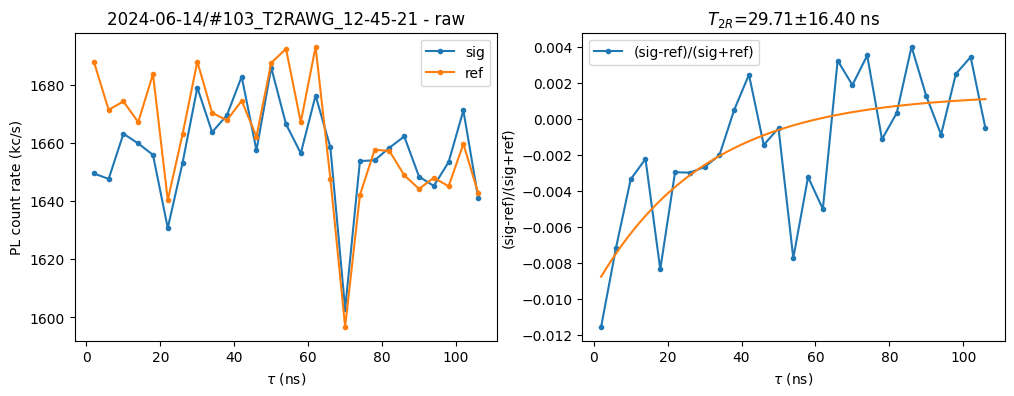

In [40]:
type = 'T2RAWG'
month = 6; days=np.linspace(1,14,14)
month = 7; days=np.linspace(1,1,1)
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2024-0'+str(month)+'-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        if type in dataFolder:
            idx = int(dataFolder[1:4])
            if day==1 and idx >= 22:
                datafile = mainFolder + dataFolder +'/T2RAWGObject_sig_set.dat'
                guess = (-0.01,17,0.1)
                sig, ref, popt, perr, x_s = dr.readData(datafile, type='T2R', typeNorm=Q_FINAL, ifFit=1, guess=guess)

(0.0, 100.0)

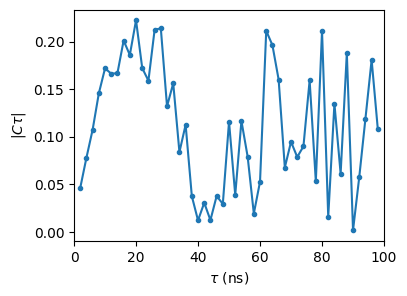

In [48]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x_s, np.abs((sig-ref)/(sig+ref))*x_s,'o-', markersize=3,)
ax.set_ylabel('$|C\\tau|$')
ax.set_xlabel('$\\tau$ (ns)')

ax.set_xlim((0,100))
# ax.set_ylim((0,0.2))

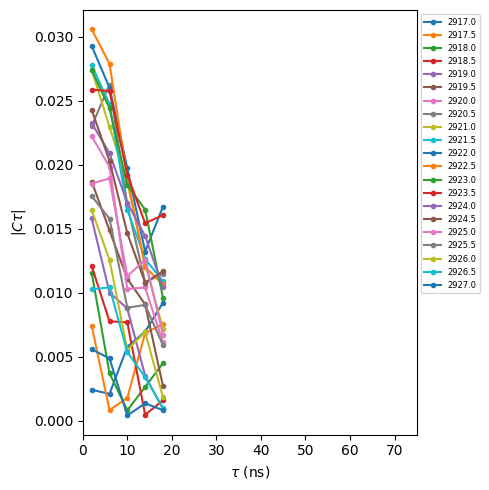

In [110]:
sigs = []; refs= []; xs = []
# freqs = np.linspace(2842e6,2843e6,11)
freqs = np.linspace(2841e6,2844e6,31) #240613 DS51-81
freqs = np.linspace(2839e6, 2849e6, 21) #240614 DS 28-48
freqs = np.linspace(2917e6, 2927e6, 21) #240614 DS 50-70

type = 'T2RAWG'
month = 6; days=np.linspace(1,14,14)
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2024-0'+str(month)+'-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        if type in dataFolder:
            idx = int(dataFolder[1:4])
            # if day==13 and idx >= 51 and idx <= 81:
            # if day==14 and idx >= 28 and idx <= 48:
            if day==14 and idx >= 72 and idx <= 92:
                datafile = mainFolder + dataFolder +'/T2RAWGObject_sig_set.dat'
                guess = (-0.01,17,0.1)
                sig, ref, popt, perr, x_s = dr.readData(datafile, type='T2R', typeNorm=Q_FINAL, ifPlot=0,ifFit=1, guess=guess)
                sigs.append(sig); refs.append(ref); xs.append(x_s)

fig, ax = plt.subplots(figsize=(5,5))          
for i in range(len(sigs)):    
    ax.plot(xs[i], np.abs((sigs[i]-refs[i])/(sigs[i]+refs[i])),'o-', markersize=3,label=str(freqs[i]/1e6))
ax.set_ylabel('$|C\\tau|$')
ax.set_xlabel('$\\tau$ (ns)')

ax.set_xlim((0,75))
# ax.set_ylim((0.45,0.65))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=6)
plt.subplots_adjust(right=0.75)
plt.tight_layout()


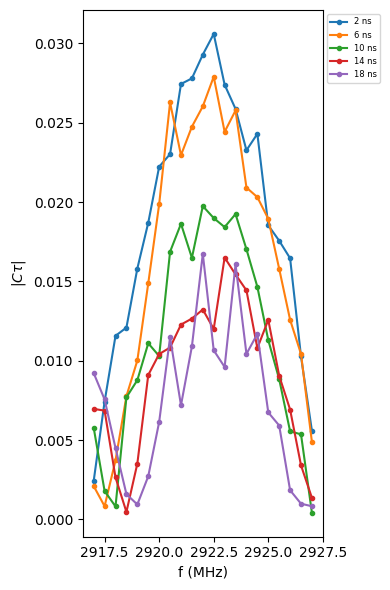

In [114]:
i = 1
sigs = np.array(sigs); refs = np.array(refs); xs = np.array(xs)
fig, ax = plt.subplots(figsize=(4,6))       
for i in range(5):
       
    ax.plot(freqs/1e6, np.abs((sigs[:,i]-refs[:,i])/(sigs[:,i]+refs[:,i])) + 0*i,'o-', markersize=3,label='%.0f ns' %(xs[0,i]))
    ax.set_ylabel('$|C\\tau|$')
    ax.set_xlabel('f (MHz)')

    # ax.set_xlim((0,75))
    # ax.set_ylim((0.45,0.65))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=6)
plt.subplots_adjust(right=0.75)
plt.tight_layout()


array([ 0.14545158,  1.42126683,  1.64565724,  0.27326166,  0.69532761,
       -0.47088415,  0.25295856,  0.78354495, -1.03801558,  0.01000018,
        0.62360239, -2.19617566, -0.36610831])

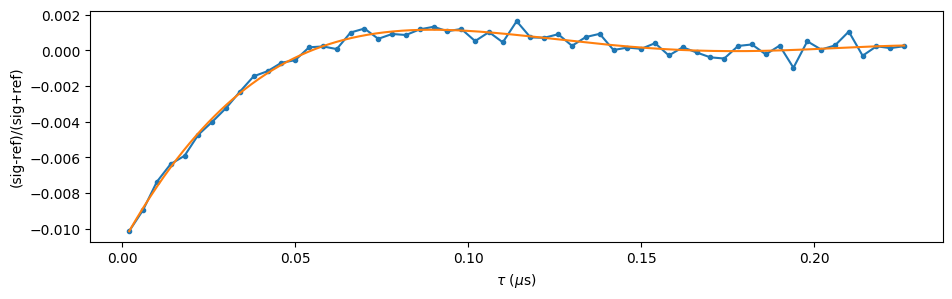

In [233]:
fig, ax = plt.subplots(figsize=(11,3))
x = x_s
y = (sig-ref)/(sig+ref)

ax.plot(x/1e3,y, 'o-', markersize=3,)
ax.set_xlabel(r"$\tau$ ($\mu$s)")
ax.set_ylabel('(sig-ref)/(sig+ref)')
# ax.set_yscale('log')
# ax.set_xscale('log')

guess = (0.05, 1.1494, 0,    0.05, 0.995, 0,    0.05, 3.4483, -pi,   0.05, 3.3483, -pi, 0)
# ax.plot(x/1e3, dr.cosThree(x/1e3, *guess),  'o-', markersize=3,color='C2')
lowerBounds = (0.01,0,-pi,   0.01,0,-pi,   0.01,0,-pi,  0.01,0,-pi, -1)
upperBounds = (1,2, 7*pi,   1,4,6*pi,    1,4, 5*pi,  1,4, 5*pi, 1)
xfit, yfit, popt, perr = dr.fitCosFour(x/1e3, y, guess=guess, lowerBounds=lowerBounds)
ax.plot(xfit, yfit, color='C1')
popt
# ax.set_title(r'$T_{2E}$ = %.2f $\pm$ %.2f $\mu$s; $n$ = %.2f $\pm$ %.2f' % (popt[1], perr[1], popt[2], perr[2]))
# ax.set_xlim((-0.1,10.1))

In [ ]:
fittedPeaks = np.array((np.round(popt[1],4),np.round(popt[4],4),np.round(popt[7],4),np.round(popt[10],4)))
print("Fitted peaks (MHz)", fittedPeaks)

In [ ]:
yfourier = np.fft.fft(y-np.average(y)); yfourier = np.abs(yfourier)
f = np.fft.fftfreq(len(y), 10e-9)/1e6

sorted_indices = np.argsort(f)       # Get the indices that would sort f
f = f[sorted_indices]                # Sort f in ascending order
yfourier = yfourier[sorted_indices]  # Reorder yfourier based on the sorted_indices

# Plot the signal and its Fourier Transform
fig, axs = plt.subplots(2,1, figsize=(12,6))
axs[0].plot(x/1e3,y, 'o-', markersize=3,)
axs[0].set_xlabel(r"$\tau$ ($\mu$s)")
axs[0].set_ylabel('(sig-ref)/(sig+ref)')

axs[1].plot(f, yfourier, linestyle='-', marker='o', markersize=3, color='C1')
axs[1].set_title('')
axs[1].set_xlabel('Frequency (MHz)')
axs[1].set_ylabel('Fourier Transform')
axs[1].set_xlim((-5,5))

def find_peaks(data, threshold=0):
    peaks = []
    for i in range(1, len(data) - 1):
        if data[i] > data[i - 1] and data[i] > data[i + 1] and data[i] > threshold:
            peaks.append(i)
    return peaks

threshold = 11
peaks = find_peaks(yfourier, threshold=threshold)
fpeaks = f[peaks]; fpeaks = fpeaks[int(len(fpeaks)/2):]
print(np.round(fpeaks*1e3,1))

axs[1].hlines(y=threshold, xmin=min(f), xmax=max(f), linestyle='--', linewidth = 1)

plt.tight_layout()
plt.show()

# T2R 4 point

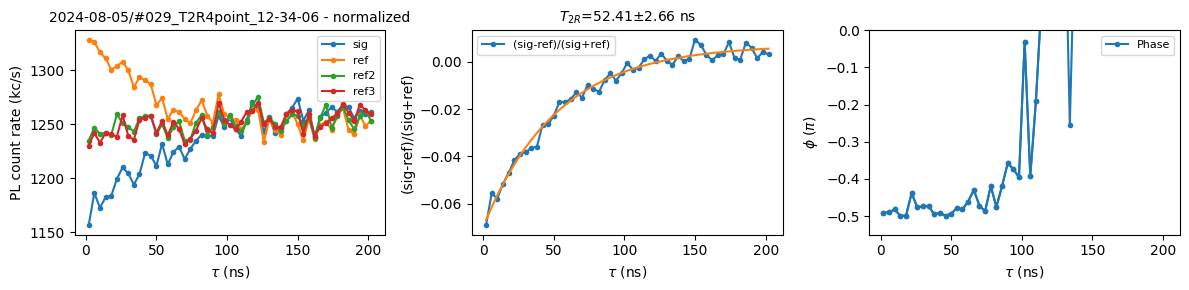

[-7.71108383e-02  7.28848902e-03  5.24110655e+01]


In [726]:
type = 'T2R4point'
month = 6; days=np.linspace(1,14,14)
# month = 7; days=np.linspace(1,3,3)
month = 8; days=np.linspace(1,5,5)
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2024-0'+str(month)+'-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        if type in dataFolder:
            idx = int(dataFolder[1:4])
            if day==5 and idx == 29:
                datafile = mainFolder + dataFolder +'/' + type +'Object_sig_set.dat'
                guess = (-0.03, 0, 17); ifFit=1
                # guess = (-0.018, 200, 0, 0, 200); ifFit=2 #(t, A, Tpi, phi,C, T2)
                sig, ref, ref2,ref3,popt, perr, x_s = dr.readData4point(datafile, 
                                                       type='T2R', typeNorm=Q_FINAL, ifFit=ifFit, guess=guess)
                print(popt)

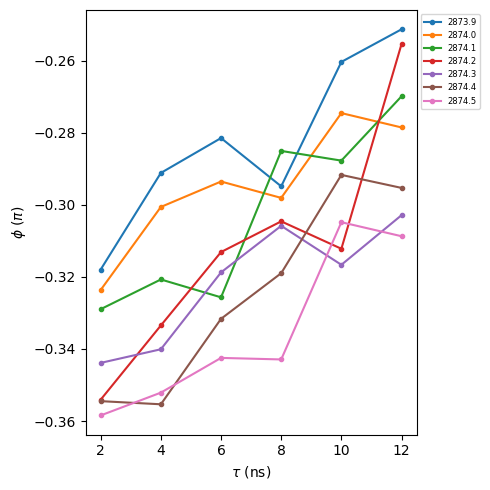

In [26]:
sigs = []; refs= []; xs = []; ref2s = []; ref3s = []
# freqs = np.linspace(2873.3e6, 2873.9e6, 7) #240702 DS 18-24
f = 2874.2e6; freqs = np.linspace(f-3e5, f+3e5, 7)
f = 2874.2e6; freqs = np.linspace(f-3e5, f+3e5, 7)
type = 'T2R4point'
month = 7; days=np.linspace(1,2,2)
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2024-0'+str(month)+'-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        if type in dataFolder:
            idx = int(dataFolder[1:4])
            if day==2 and idx >= 34 and idx <= 40:
                datafile = mainFolder + dataFolder +'/T2R4pointObject_sig_set.dat'
                guess = (-0.03, 0, 17); ifFit=1
                guess = (-0.018, 200, 0, 0, 200); ifFit=0 #(t, A, Tpi, phi,C, T2)
                sig, ref, ref2, ref3, popt, perr, x_s = dr.readData4point(datafile, ifPlot=0,
                                                       type='T2R', typeNorm=Q_FINAL, ifFit=ifFit, guess=guess)
                sigs.append(sig); refs.append(ref); xs.append(x_s); ref2s.append(ref2); ref3s.append(ref3)

fig, ax = plt.subplots(figsize=(5,5))          
for i in range(len(sigs)):    
    phase = np.arctan((sigs[i]-refs[i])/(ref2s[i]-ref3s[i]))/np.pi
    for j, phi in enumerate(phase):
        if j >=15 and phi < 0:
            phase[j] = phi+1
    ax.plot(xs[i], phase,'o-', markersize=3,label=str(freqs[i]/1e6));
ax.set_ylabel('$\phi$ ($\pi$)')
ax.set_xlabel('$\\tau$ (ns)')

# ax.set_xlim((0,40))
# ax.set_ylim((-0.4,0))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=6)
plt.subplots_adjust(right=0.75)
plt.tight_layout()


# T1

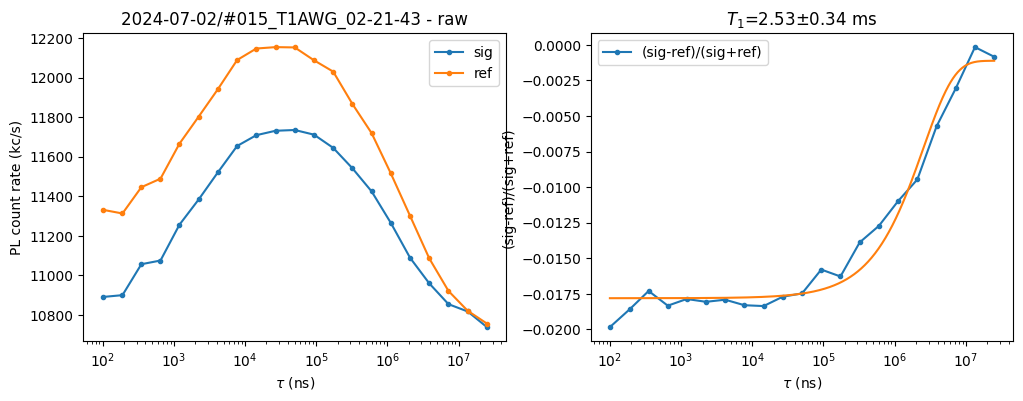

In [140]:
type = 'T1AWG'
month = 6; days=np.linspace(1,14,14)
month = 7; days=np.linspace(1,2,2)
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2024-0'+str(month)+'-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        if type in dataFolder:
            idx = int(dataFolder[1:4])
            if day==2 and idx >= 15:
                datafile = mainFolder + dataFolder +'/' + type +'Object_sig_set.dat'
                guess = (-0.01,17,0.1)
                sig, ref, popt, perr, x_s = dr.readData(datafile, type='T1', typeNorm=Q_FINAL, ifFit=1, guess=guess)

# Sat curve

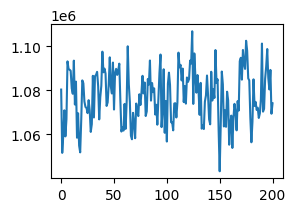

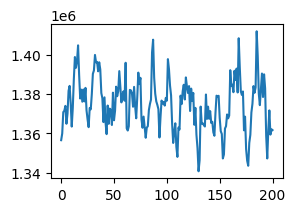

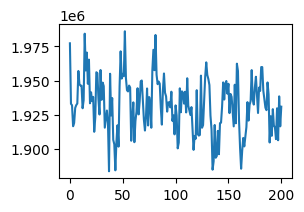

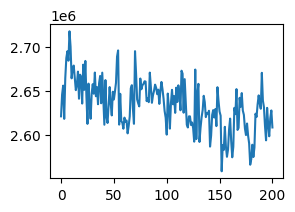

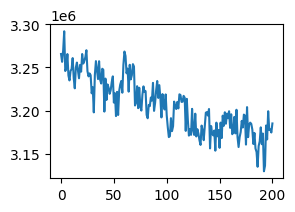

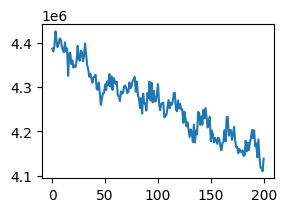

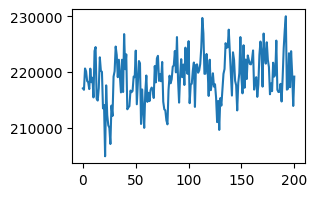

In [324]:
# Saturation rate
days = np.linspace(1,16,16)
dataArr = []; dataArrDark = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2024-05-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'counter' in dataFolder:
            idx = int(dataFolder[1:4])
            if (day==16 and idx >= 42 and idx <= 48):
                datafile = mainFolder + dataFolder +'/time_s_set.dat'
                x_s, sig = dr.readDataNoRef(datafile)
                sig = np.array(sig[0:])
                n = len(x_s)
                # print("n = " + str(n) + "; Avg count rate = " + str(np.round(np.average(sig))))
                fig,ax = plt.subplots(figsize=(3,2))
                ax.plot(x_s,sig)
                if idx <= 1060: dataArr.append(np.round(np.average(sig)))
                else: dataArrDark.append(np.round(np.average(sig)))

[-1.34756742e+05  2.88091291e+09  1.60281900e+07 -1.13348058e+05
  2.94178268e+09  1.10266240e+07  1.12214583e+00]


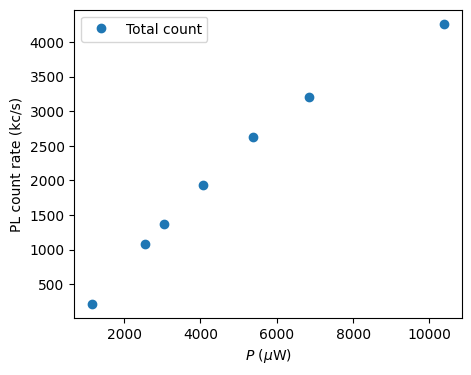

In [321]:
fig, ax = plt.subplots(figsize=(5,4))

# x = np.array((3000,4080,5250,6650,7800, 8750,10400))
# x = np.array((2340,1520,1270,805,243,0,2850, 3000,4080,5250,6650,7800, 8750,10400))
x = np.array((540,820,1190,1860,3160,4950,5600,7200,10650,0))
x = np.array((3070,2770,2200,1900,1250,800,670,500,310,190,70,0.02,1670,4130,5010,5730,6360,7070,10600))
x = np.array((3040,2470,2000,1610,1330,1140,740,400,160,0,3460,3960,4570,5430,5700,6600,6900,7670,8430,
              9080,970,10600))
x = np.array((3130,2720,2060,1340,82,330,720,10700,9820,9000,8370,7570,6750,6000,5400,4860,4040))
x = np.array((1520, 1150, 910, 720, 490, 310, 185, 55, 5250, 2020, 2520, 3000, 3630))*2
x = np.array((383, 1190, 750, 2400, 3150, 4960, 7090, 10450))
x = np.array((4930,3920,2910,2230,1600,730,140,5570,6910,10450))
x = np.array((2550,3050,4070,5390,6840,10390,1160))
y = np.array(dataArr)

# xd = np.array((2670,1070,480,0))
# yd = np.array(dataArrDark)

x = np.sort(x); y = np.sort(y/1000);# xd = np.sort(xd); yd = np.sort(yd/1000)
# popt, pcov = curve_fit(dr.linear, xd, yd)
# perr = np.sqrt(np.diag(pcov))
# xdfit = np.linspace(xd, xd[-1], 1001)
# ydfit = dr.linear(xdfit, *popt)

# yfit_few = dr.linear(x,*popt)
# y_subtr = y-yfit_few

# xfit, yfit, popt, perr = dr.fitSaturation(x, y_subtr, guess=None)

plot1 = ax.plot(x,y,'o',color='C0', label="Total count")
# plot2 = ax.plot(xd,yd, 'o', color='C1', label="Dark count")
# plot3 = ax.plot(xdfit, ydfit,color='C1')
# plot4 = ax.plot(x,y_subtr, 'o', color='C2', label="BG subtracted count")
# plot5 = ax.plot(xfit, yfit, color='C2')
ax.set_xlabel(r"$P$ ($\mu$W)")
ax.set_ylabel(r"PL count rate (kc/s)")
# ax.set_title("$I_{sat}$ = %.1f kc/s, $P_{sat}$ = %.3f mW" % (popt[0], popt[1]/1e3))
ax.legend()
# ax.set_yscale('log')
# ax.set_xscale('log')
print(popt)

### Shallow

In [ ]:
# Saturation rate
days = np.linspace(10,10,1)
dataArr = []; dataArrDark = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'counter' in dataFolder:
            idx = int(dataFolder[1:4])
            if idx >= 4 and idx <= 22:
                datafile = mainFolder + dataFolder +'/time_s_set.dat'
                x_s, sig = dr.readDataNoRef(datafile)
                sig = np.array(sig[0:-1])
                n = len(x_s)
                print("n = " + str(n) + "; Avg count rate = " + str(np.round(np.average(sig))))
                if idx <= 17: dataArr.append(np.round(np.average(sig)))
                else: dataArrDark.append(np.round(np.average(sig)))

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))

x = np.array((6800,4700,3120,2200,1720,1295,1050,855,595,445,340,188,89,0))
y = np.array(dataArr)

xd = np.array((0,280,810,2190,3040))
yd = np.array(dataArrDark)

x = np.sort(x); y = np.sort(y/1000); xd = np.sort(xd); yd = np.sort(yd/1000)
popt, pcov = curve_fit(dr.linear, xd, yd)
perr = np.sqrt(np.diag(pcov))
xdfit = np.linspace(xd, xd[-1], 1001)
ydfit = dr.linear(xdfit, *popt)

yfit_few = dr.linear(x,*popt)
y_subtr = y-yfit_few

xfit, yfit, popt, perr = dr.fitSaturation(x, y_subtr, guess=None)

plot1 = ax.plot(x,y,'o',color='C0', label="Total count")
plot2 = ax.plot(xd,yd, 'o', color='C1', label="Dark count")
plot3 = ax.plot(xdfit, ydfit,color='C1')
plot4 = ax.plot(x,y_subtr, 'o', color='C2', label="BG subtracted count")
plot5 = ax.plot(xfit, yfit, color='C2')
ax.set_xlabel(r"$P$ ($\mu$W)")
ax.set_ylabel(r"PL count rate (kc/s)")
ax.set_title("$I_{sat}$ = %.1f kc/s, $P_{sat}$ = %.3f mW" % (popt[0], popt[1]/1e3))
ax.legend()
# ax.set_yscale('log')
# ax.set_xscale('log')
print(popt)

In [ ]:
x = np.linspace(1,100,100)
y = x**2
from scipy.optimize import curve_fit
def linear(x, a,b):
    return a*x+b
def fitLinear(xdata, ydata, guess=None):
    popt, pcov = curve_fit(linear, xdata, ydata, p0=guess)
    perr = np.sqrt(np.diag(pcov))
    xfit = np.linspace(xdata[0], xdata[-1], 1001)
    yfit = linear(xfit, *popt)
    return xfit, yfit, popt, perr

xfit, yfit, popt, perr = fitLinear(x,y)

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x,y, 'o-',markersize=3,)
ax.plot(xfit,yfit)
ax.set_title('$a =$ %.2f $\pm$ %.2f' % (popt[0], perr[0]))